In [1]:
import black
import jupyter_black

jupyter_black.load(
    lab=False,
    line_length=79,
    verbosity="DEBUG",
    target_version=black.TargetVersion.PY313,
)

DEBUG:jupyter_black:Using config from C:\Users\haavarug\Documents\VSCode-PhD\chemometrics\pyproject.toml
DEBUG:jupyter_black:config: {'line_length': 79, 'lab': False, 'target_versions': {<TargetVersion.PY313: 13>}}


TypeError: Mode.__init__() got an unexpected keyword argument 'lab'

# Solution to exercise set 5: Partial Least squares and training and testing.

The main goals of this exercise are to perform Partial Least Squares (PLS) regression and use training and testing sets. Using training and testing sets allows us to assess the model's ability to generalize to unseen data and avoid overfitting. 

**Learning Objectives:**

After completing this exercise set, you will be able to:

- Create a PLS regression model.
- Create and use training and test sets.
- Assess your regression model by calculating root mean squared errors.

**To get the exercise approved, complete the following problems:**

* [5.1(a)](#5.1(a)), [5.1(b)](#5.1(b)), and [5.1(c)](#9.1(c)): To show that you can train a Partial Least Squares regression model and calculate RMSEC (Root Mean Squared Error of Calibration) and RMSEP (Root Mean Squared Error of Prediction).

## Exercise 5.1 Partial Least Squares with training and testing

[Windig and Stephenson](https://doi.org/10.1021/ac00046a015) measured near-infrared spectra
for 140 mixtures of the solvents methylene chloride, 2-butanol, methanol,
dichloropropane, and acetone. Here, we will predict the compositions of the mixtures from the spectra.
Each spectrum was sampled at 700 wavelengths
between 1100 and 2500 nm. The file
[`windig.csv`](windig.csv) contains the raw data:
Each row in this file
contains a spectrum (the columns starting with `wavelength.`) and the
corresponding concentrations (the columns starting with `conc.`).

**The goal of exercise 5.1 is to make a model for predicting the composition of a mixture from its spectrum.**

You can inspect the raw data by:

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
sns.set_theme(style="ticks", context="notebook", palette="colorblind")


data = pd.read_csv("windig.csv")
X = data.filter(like="wavelength", axis=1).values  # NIR spectra
Y = data.filter(like="conc", axis=1).values  # Concentrations
print(f"No. of spectra: {X.shape[0]}")
print(f"No. of wavelengths: {X.shape[1]}")
print(f"No of concentration samples: {Y.shape[0]}")
print(f"No of species in each sample: {Y.shape[1]}")

No. of spectra: 140
No. of wavelengths: 700
No of concentration samples: 140
No of species in each sample: 5


And the individual spectra can be visualised with:

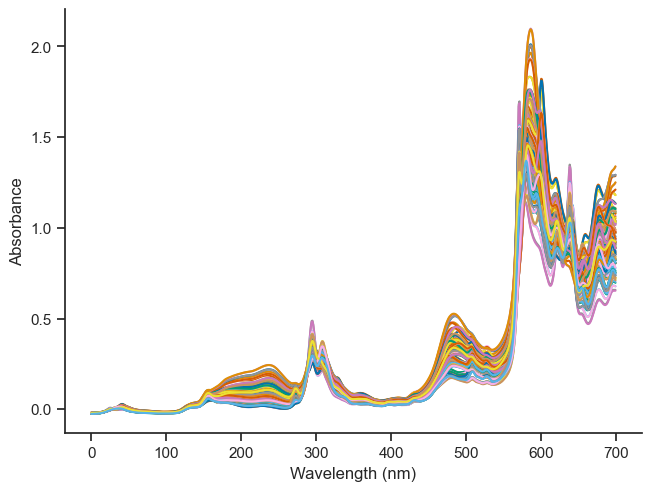

In [6]:
# To plot the spectra:
fig, ax = plt.subplots(constrained_layout=True)
for spectrum in X:
    ax.plot(spectrum)
ax.set(xlabel="Wavelength (nm)", ylabel="Absorbance")
sns.despine(fig=fig)

**Note:** The spectra have been processed so you can use the directly.

### 5.1(a)

To develop and assess your model, you will create and make use of a training and testing data set.

**Explain what the purposes of these two sets are and how they can be created.**

#### Your answer to question 5.1(a): What is the purpose of the training and testing data sets, and how are they created?

The training set is used to train the model, while the testing set evaluates its performance on unseen samples, testing its ability to generalize. These sets are created by randomly splitting the original data.

### 5.1(b)

**Split the raw data into a training set and a test set. Use 33% of the data for the test set. How many samples do you have in the training set and the test set?**

**Hint:** With scikit-learn's [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), splitting the data can be done with
```python
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.33,  # Use 33 % of the data (one-third) for the test set.
    shuffle=True,  # Randomly shuffle the data
)
```

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X,
    Y,
    test_size=0.33,  # Use 33 % of the data (one-third) for the test set.
    shuffle=True,  # Randomly shuffle the data
    random_state=2025,  # To get the same splits every time we run this
)

In [8]:
print(X_train.shape, X_test.shape)

(93, 700) (47, 700)


#### Your answer to question 5.1(b): How many samples do you have in the training set and the test set?

There are 93 samples in the training set and 47 samples in the test set.

### 5.1(c)

**Task: Create a Partial Least Squares (PLS) regression model for predicting the concentrations from the spectra. Use 2 latent variables for the PLS model and evaluate your model by calculating the RMSEC (root mean squared error of calibration) and RMSEP (root mean squared error of prediction) for each of the five concentrations.**

**Hints:**

1.  **Create a PLS regression model:**
    ```python
    from sklearn.cross_decomposition import PLSRegression
    # Set up a PLS model:
    model = PLSRegression(
        n_components=2,  # Use two components (latent variables)
        scale=False,  # Do not scale X and Y (we will do this separately, if needed)
    )
    ```

2.  **Fit the model to the training data:**
    ```python
    model.fit(X_train, Y_train)  # Fit/make the model
    ```

3.  **Calculate the RMSEC (root mean squared error of calibration):**
    * When we use the training set to create our model, we are doing a *calibration*. If we calculate the RMSE (root mean squared error) based on the training set, we refer to this as the RMSEC. This quantifies the error we get in connection with making (calibrating) the model.
    ```python
    from sklearn.metrics import root_mean_squared_error

    y_hat_train = model.predict(X_train)
    rmsec = root_mean_squared_error(Y_train, y_hat_train)
    ```

4.  **Calculate the RMSEP (root mean squared error of prediction):**
    * When we use the test set to test our model, we are checking how well our model *predicts* "new" samples (that is, samples not used when making the model). If we calculate RMSE based on the test set, we refer to this as the RMSEP. This quantifies the error we can expect to make when using our model for predicting new samples.
    ```python
    y_hat_test = model.predict(X_test)
    rmsep = root_mean_squared_error(Y_test, y_hat_test)
    ```

In [9]:
from sklearn.cross_decomposition import PLSRegression

model = PLSRegression(
    n_components=2, scale=False
)  # Set up a PLS model with 2 components

In [10]:
model.fit(X_train, Y_train)

PLSRegression(scale=False)

In [11]:
from sklearn.metrics import root_mean_squared_error

y_hat_train = model.predict(X_train)
rmsec = root_mean_squared_error(Y_train, y_hat_train)

In [12]:
y_hat_test = model.predict(X_test)
rmsep = root_mean_squared_error(Y_test, y_hat_test)

In [13]:
print(f"RMSEC = {rmsec:.3g}")
print(f"RMSEP = {rmsep:.3g}")

RMSEC = 7.55
RMSEP = 8.69


In [14]:
# For comparison, Y is:
print(f"Mean (Y) = {np.mean(Y, axis=0)}")
print(f"Min (Y) = {np.min(Y, axis=0)}")
print(f"Max (Y) = {np.max(Y, axis=0)}")

Mean (Y) = [19.91914286 20.13455714 19.95128571 19.99757143 19.99757143]
Min (Y) = [9.86 9.94 9.86 9.94 9.85]
Max (Y) = [59.68 59.86 59.37 59.75 60.03]


#### Your answer to question 5.1(c): What values did you get for RMSEC and RMSEP.

The RMSEC and RMSEP are printed above. They are comparable to the smallest concentrations, so the errors are quite large.

### 5.1(d)

**Task: Optimize the number of PLS components by performing cross-validation on a grid where you vary the number of components. Calculate RMSEC, RMSECV (root mean squared error of cross-validation), and RMSEP for your new model. Report the optimal number of components.**

**Hints:**

1. **Optimize the number of components by using cross-validation on a grid of possible parameters, for instance, by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for scikit-learn:**
```python
from sklearn.model_selection import GridSearchCV

parameters = {"n_components": range(1, 11)}  # Test 1 through 10 components
# Set up a search over the parameter space:
grid_search = GridSearchCV(
    PLSRegression(scale=False),  # The base model
    parameters,  # The parameters we will consider,
    cv=5,  # The number of splits for the cross-validation
    scoring="neg_mean_squared_error",  # How we score how well the model is performing
    refit=True,  # Refit using the best-found parameters on the whole training set.
)
# Run the cross-validation
grid_search.fit(X_train, Y_train)
# Get the best number of components:
best_components = grid_search.best_params_["n_components"]
# Get the best-performing model:
best_model = grid_search.best_estimator_
# Get the results per parameter considered:
mean_score = grid_search.cv_results_["mean_test_score"]  # The mean score
error_score = grid_search.cv_results_[
    "std_test_score"
]  # The uncertainty in the score
# These two can be plotted as a function of the number of parameters considered;
# this can help us see the best parameters while considering the error.
```

2. **Recalculate RMSECV using the optimized model, for instance, by using [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) from scikit-learn:**
```python
from sklearn.model_selection import cross_val_score

cvscore = cross_val_score(
    model,  # Select the model we are going to score
    X_train,  # Give the X-training set
    Y_train,  # Give the y-training set
    scoring="neg_mean_squared_error",  # select scoring method
    cv=5,  # Number of splits to make
)
cvscore = np.sqrt(-cvscore)  # Account for the negative sign.
rmsecv = cvscore.mean()
rmsecv_std = np.std(cvscore)
print(f"\nRMSECV: {rmsecv} ± {rmsecv_std}")
```

**Note:** We use a *negative* mean squared error for the grid search and for calculating RMSECV. This is because the methods `cross_val_score` and `GridSearchCV` are often used in connection with optimization where we want to *maximize* something. If we *maximize the negative* of the mean squared error, we can *minimize the error*.

In [15]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_components": range(1, 21)}  # Test 1 through 20 components
# Set up a search over the parameter space:
grid_search = GridSearchCV(
    PLSRegression(scale=False),  # The base model
    parameters,  # The parameters we will consider,
    cv=5,  # The number of splits for the cross-validation
    scoring="neg_mean_squared_error",  # How we score how well the model is performing
    refit=True,  # Refit using the best-found parameters on the whole training set.
)
# Run the cross-validation
grid_search.fit(X_train, Y_train)
# Get the best number of components:
best_components = grid_search.best_params_["n_components"]
# Get the best-performing model:
best_model = grid_search.best_estimator_
# Get the results per parameter considered:
mean_score = grid_search.cv_results_["mean_test_score"]  # The mean score
error_score = grid_search.cv_results_[
    "std_test_score"
]  # The uncertainty in the score
print(f"Best components: {best_components}")

Best components: 20


<ErrorbarContainer object of 3 artists>

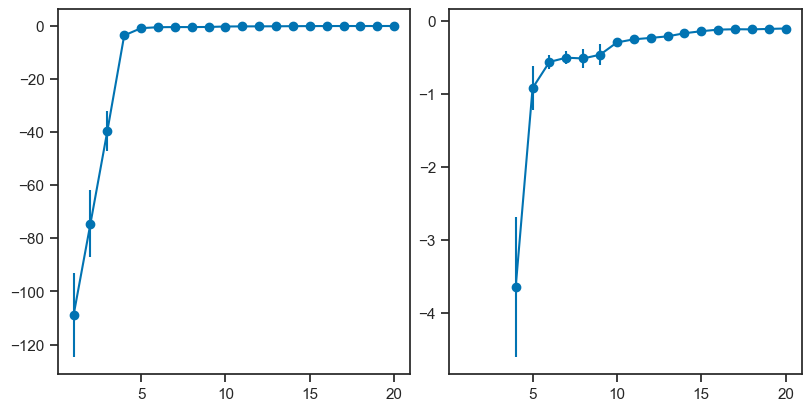

In [16]:
fig, (ax1, ax2) = plt.subplots(
    constrained_layout=True, ncols=2, sharex=True, figsize=(8, 4)
)
ax1.errorbar(
    parameters["n_components"], mean_score, yerr=error_score, marker="o"
)
ax2.errorbar(
    parameters["n_components"][3:],
    mean_score[3:],
    yerr=error_score[3:],
    marker="o",
)

In [17]:
from sklearn.model_selection import cross_val_score

pls_optimized = PLSRegression(n_components=6, scale=False)
pls_optimized.fit(X_train, Y_train)

cvscore = cross_val_score(
    pls_optimized,  # Select the model we are going to score
    X_train,  # Give the X-training set
    Y_train,  # Give the y-training set
    scoring="neg_mean_squared_error",  # select scoring method
    cv=5,  # Number of splits to make
)
cvscore = np.sqrt(-cvscore)  # Account for the negative sign.
rmsecv = cvscore.mean()
rmsecv_std = np.std(cvscore)
print(f"\nRMSECV: {rmsecv} ± {rmsecv_std}")


RMSECV: 0.7484766232148679 ± 0.06197105250002561


#### Your answer to question 5.1(d): What is the optimal number of components?

While grid search yielded 21 components, analysis of the mean squared error suggests diminishing returns beyond 6-7 components. To prioritize model simplicity, we select 6 components as the optimal number.

### 5.1(e)

**Task: Show the results for the training data and the testing data graphically by plotting the predicted vs. the observed values for all 5 chemical components for the optimized model. Include RMSEC, R² for the training set, RMSEP and R² for the test set as labels in your figure (calculate these for each component separately). Further, report the metrics you calculated in a table.**

**Hint:** The R² can be calculated using:
```python
from sklearn.metrics import r2_score

component_number = 1  # To select a column (one component) from Y:
r_squared_train = r2_score(Y_train[:,component_number], y_predicted_train[:,component_number])
r_squared_test = r2_score(Y_test[:,component_number], y_predicted_test[:,component_number])
```

In [18]:
from sklearn.metrics import r2_score

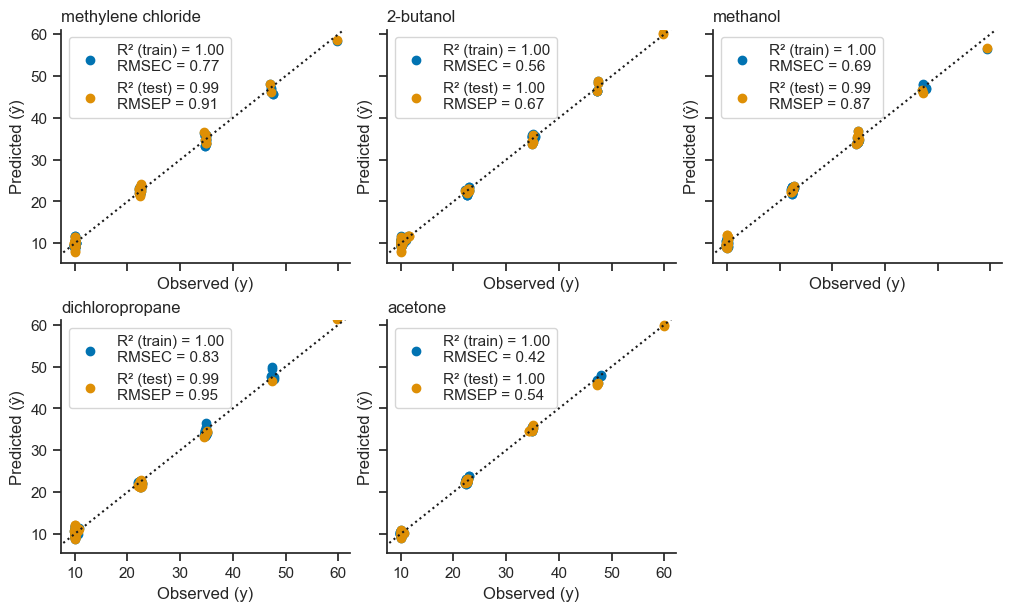

In [19]:
Y_hat_train = pls_optimized.predict(X_train)
Y_hat_test = pls_optimized.predict(X_test)

components = [
    "methylene chloride",
    "2-butanol",
    "methanol",
    "dichloropropane",
    "acetone",
]

fig, axes = plt.subplots(
    constrained_layout=True,
    ncols=3,
    nrows=2,
    sharex=True,
    sharey=True,
    figsize=(10, 6),
)
axes = axes.flatten()
axes_used = []

table = {
    "Component": [],
    "RMSEC": [],
    "RMSEP": [],
    "R² (train)": [],
    "R² (test)": [],
}

for i, component in enumerate(components):
    r_squared_train = r2_score(Y_train[:, i], Y_hat_train[:, i])
    rmse_train = root_mean_squared_error(Y_train[:, i], Y_hat_train[:, i])

    r_squared_test = r2_score(Y_test[:, i], Y_hat_test[:, i])
    rmse_test = root_mean_squared_error(Y_test[:, i], Y_hat_test[:, i])

    table["Component"].append(component)
    table["RMSEC"].append(rmse_train)
    table["RMSEP"].append(rmse_test)
    table["R² (train)"].append(r_squared_train)
    table["R² (test)"].append(r_squared_test)

    txt_train = f"R² (train) = {r_squared_train:.2f}\nRMSEC = {rmse_train:.2f}"
    txt_test = f"R² (test) = {r_squared_test:.2f}\nRMSEP = {rmse_test:.2f}"

    axes[i].scatter(Y_train[:, i], Y_hat_train[:, i], label=txt_train)
    axes[i].scatter(Y_test[:, i], Y_hat_test[:, i], label=txt_test)

    axes[i].set_xlabel("Observed (y)")
    axes[i].set_ylabel("Predicted (ŷ)")
    axes[i].set_title(f"{component}", loc="left")
    axes[i].legend()

    xaxis = axes[i].get_xlim()
    yaxis = axes[i].get_ylim()

    imin = min(xaxis + yaxis)
    imax = max(xaxis + yaxis)

    axes[i].plot([imin, imax], [imin, imax], ls=":", color="k")
    axes[i].set_xlim(xaxis)
    axes[i].set_ylim(yaxis)

    axes_used.append(axes[i])

for ax in axes:
    if ax not in axes_used:
        ax.axis("off")
sns.despine(fig=fig)
fig.savefig("5.1.e.png", dpi=300)

In [20]:
pd.DataFrame(table)

,Component,RMSEC,RMSEP,R² (train),R² (test)
0,methylene chloride,0.774702,0.913428,0.996022,0.994106
1,2-butanol,0.564740,0.666846,0.997418,0.997723
2,methanol,0.686723,0.871563,0.996762,0.994905
3,dichloropropane,0.829081,0.954528,0.995730,0.992305
4,acetone,0.416455,0.541473,0.998559,0.998490


#### Your answer to question 5.1(e): Report the metrics you found:

The evaluation metrics, as presented in the table above. The RMSEP, consistently below 1, signifies a prediction error within 10% of the minimum concentration, suggesting good accuracy across the concentration range.

## Exercise 5.2 Use of cross-validation when we have few samples

It is not always feasible to do the split into training and test sets when we have few samples. Another option then is to use something called **Leave-one-out cross-validation** (LOOCV). LOOCV involves training the model on all but one data point and using the remaining point for testing, repeating this process for each data point. We will use that method in this exercise

We will use the data of [Forbes](https://doi.org/10.1017/S0080456800032075) who investigated the
relationship between the boiling point of water and the atmospheric pressure, and collected data in the Alps and Scotland. Forbes' goal was to estimate altitudes from the boiling point alone.

### 5.2(a)

**Task: Load the data from Forbes (data file [forbes.csv](forbes.csv)), plot it, and create a linear regression model
that predicts the atmospheric pressure from the temperature. Report the R² and [root mean
squared error (RMSE)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.root_mean_squared_error.html) for your model.**

In [21]:
forbes = pd.read_csv("forbes.csv")
forbes.head()

,Temperature (F),Pressure (inches Hg)
0,194.5,20.79
1,194.3,20.79
2,197.9,22.40
3,198.4,22.67
4,199.4,23.15


In [22]:
X_forbes = forbes["Temperature (F)"].to_numpy().reshape(-1, 1)
y_forbes = forbes["Pressure (inches Hg)"].to_numpy()

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model_forbes = LinearRegression(fit_intercept=True)
model_forbes.fit(X_forbes, y_forbes)
y_hat_forbes = model_forbes.predict(X_forbes)

r2_forbes = r2_score(y_forbes, y_hat_forbes)
rmse_forbes = root_mean_squared_error(y_forbes, y_hat_forbes)

C:\Users\haavarug\AppData\Local\Temp\ipykernel_20196\84335897.py:10: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  X_eval = np.row_stack([min(X_forbes), max(X_forbes)])


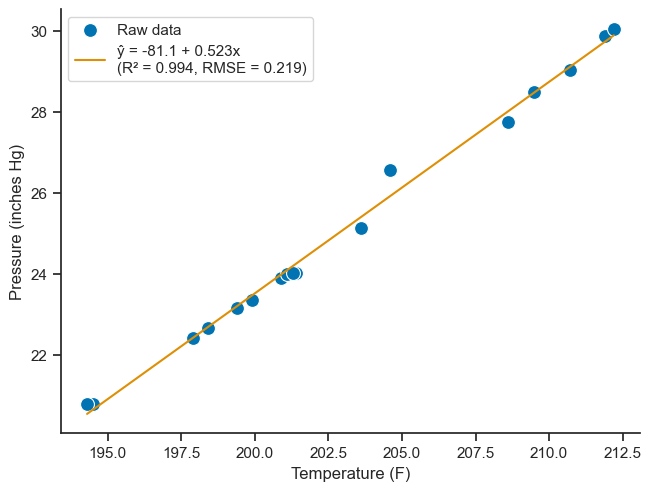

In [25]:
fig, ax = plt.subplots(constrained_layout=True)
sns.scatterplot(
    data=forbes,
    x="Temperature (F)",
    y="Pressure (inches Hg)",
    label="Raw data",
    s=100,
)

X_eval = np.row_stack([min(X_forbes), max(X_forbes)])
y_eval = model_forbes.predict(X_eval)


text = f"ŷ = {model_forbes.intercept_:.3g} + {model_forbes.coef_[0]:.3g}x"
text = f"{text}\n(R² = {r2_forbes:.3g}, RMSE = {rmse_forbes:.3g})"

ax.plot([], [])  # To cycle colors
ax.plot(
    X_eval.flatten(),
    y_eval.flatten(),
    label=text,
)
ax.legend()
sns.despine(fig=fig)

#### Your answer to question 5.2(a): What value did you get for R² and the RMSE?

The model is shown in the figure above. R² as 0.99 and the RMSE was 0.22.

### 5.2(b)

**Task: Estimate the error you can expect to make if you use your model for predicting the pressure.
Do this by LOOCV and calculate the root mean squared error of cross-validation (RMSECV)**

**Note:** LOOCV is a special case of **training** and **testing**, and you can find a short description of it
in [appendix A](#A.-Leave-one-out-cross-validation) with example code for running LOOCV. The code example for LOOCV is concise, so make sure you understand what goes on here (that is, what LOOCV is doing). If you are working with someone, try explaining testing/training and how LOOCV works to them.

In [38]:
# Method 1:
from sklearn.model_selection import LeaveOneOut


loo = LeaveOneOut()
error = []
# Split the X-data in X_temp into training and testing:
for train_index, test_index in loo.split(X_forbes):
    X_train, X_test = X_forbes[train_index], X_forbes[test_index]
    y_train, y_test = y_forbes[train_index], y_forbes[test_index]
    # Fit a new model with the training set:
    model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    # Predict y for the test set:
    y_hat = model.predict(X_test)
    # Compare the predicted y values in the test set with the measured ones:
    error.append((y_test - y_hat) ** 2)
rmsecv_1 = np.sqrt(np.mean(error))
print(f"RMSECV = {rmsecv_1}")

RMSECV = 0.24235598486501164


In [39]:
# Method 2:

from sklearn.model_selection import LeaveOneOut, cross_val_score

model = LinearRegression(fit_intercept=True)
scores = cross_val_score(
    model,
    X_forbes,
    y_forbes,
    scoring="neg_mean_squared_error",
    cv=LeaveOneOut(),
)
rmsecv_2 = np.sqrt(np.mean(-scores))
print(f"RMSECV = {rmsecv_2}")

RMSECV = 0.24235598486501164


In [28]:
# Method 3:

model = LinearRegression(fit_intercept=True)
x = forbes["Temperature (F)"].to_numpy()
model.fit(x.reshape(-1, 1), y_forbes)
y_hat_forbes = model.predict(x.reshape(-1, 1))

X_matrix = np.column_stack((np.ones_like(x), x))
H = X_matrix @ np.linalg.pinv(X_matrix)
hii = np.diagonal(H)
residuals_loo = (y_forbes - y_hat_forbes) / (1 - hii)
rmsecv_3 = np.sqrt(np.mean(residuals_loo**2))
print(f"RMSECV = {rmsecv_3}")

RMSECV = 0.24235598486501259


In [29]:
print(rmsecv_1, rmsecv_1 / rmsecv_2, rmsecv_1 / rmsecv_3)

0.24235598486501164 1.0 0.9999999999999961


C:\Users\haavarug\AppData\Local\Temp\ipykernel_20196\3080847636.py:11: DeprecationWarning: `row_stack` alias is deprecated. Use `np.vstack` directly.
  X_eval = np.row_stack([min(X_forbes), max(X_forbes)])


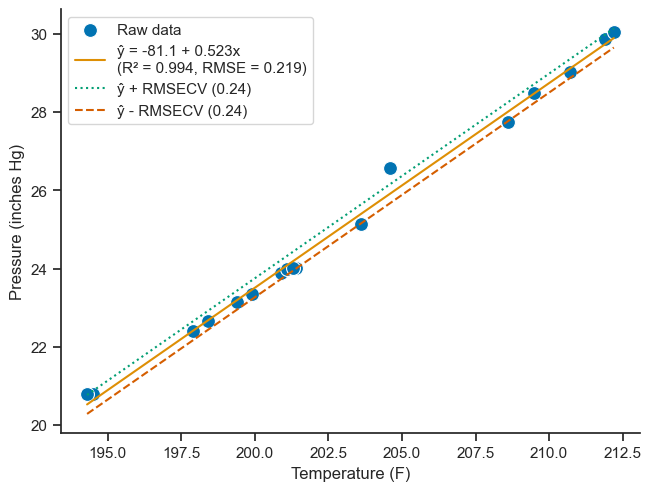

In [30]:
fig, ax = plt.subplots(constrained_layout=True)

sns.scatterplot(
    data=forbes,
    x="Temperature (F)",
    y="Pressure (inches Hg)",
    label="Raw data",
    s=100,
)

X_eval = np.row_stack([min(X_forbes), max(X_forbes)])
y_eval = model_forbes.predict(X_eval)


upper = y_eval + rmsecv_1
lower = y_eval - rmsecv_1


text = f"ŷ = {model_forbes.intercept_:.3g} + {model_forbes.coef_[0]:.3g}x"
text = f"{text}\n(R² = {r2_forbes:.3g}, RMSE = {rmse_forbes:.3g})"

ax.plot([], [])  # To cycle colors
ax.plot(
    X_eval.flatten(),
    y_eval.flatten(),
    label=text,
)


ax.plot(X_eval.flatten(), upper, label=f"ŷ + RMSECV ({rmsecv_1:.2g})", ls=":")
ax.plot(X_eval.flatten(), lower, label=f"ŷ - RMSECV ({rmsecv_1:.2g})", ls="--")

ax.legend()
sns.despine(fig=fig)

#### Your answer to question 5.2(b): What value did you get for RMSECV?

The RMSECV was 0.24. It is only slightly bigger than the RMSE previously calculated. Importantly, this value is significantly smaller than the observed pressure range of 20-30 inches Hg.

## Exercise 5.3 Partial Least Squares and interpretation of scores and loadings

The file [elements.csv](elements.csv) contains information about the elements of the periodic table. This dataset includes various physical and chemical properties, allowing us to explore the underlying relationships between these elements. The columns in the file are as follows:


| **Column**                      | **Description**                                         | **Unit** |
|:--------------------------------|:--------------------------------------------------------|:---------|
| name                            | The name of the element                                 |          |
| symbol                          | The symbol for the element (e.g. H, He, etc.)           |          |
| atomic_radius                   | Atomic radius                                           | Å        |
| atomic_weight                   | Atomic weight                                           | u        |
| covalent_radius                 | Covalent radius                                         | pm       |
| density                         | Density at 295 K                                        | g/cm³    |
| dipole_polarizability           | Dipole polarizability                                   | bohr³    |
| electrons                       | The number of electrons in the element                  |          |
| mass_number                     | Mass number of the most abundant isotope                |          |
| neutrons                        | The number of neutrons in the element                   |          |
| protons                         | The number of protons in the element                    |          |
| zeff                            | Effective nuclear charge                                |          |
| vdw_radius                      | Van der Waals radius                                    | pm       |
| first_ionization                | First ionization energy                                 | eV       |
| electronegativity allred-rochow | Allred and Rochow’s scale of electronegativity          | e²/pm²   |
| electronegativity gordy         | Gordy’s scale of electronegativity                      | e/pm     | 
| atomic_radius_wikipedia         | Atomic radius from [Wikipedia](https://en.wikipedia.org/wiki/Atomic_radii_of_the_elements_(data_page)) | pm |

### 5.3(a)

**Task: Create a PLS regression model for predicting `first_ionization`, `density`, `protons`, and `atomic_radius` from the other variables.**

**Notes:**:

1. Remove the non-numeric columns like 'name' and 'symbol' before creating the PLS model.

2. Use two components for the PLS regression model. Do not do a split into a training and test set in this exercise (this is not so crucial here since we will focus on interpreting scores and loadings).

3. Consider if you should normalize (scale) the data using a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) before performing the PLS.

In [31]:
periodic = pd.read_csv("elements.csv")
periodic.head()

,name,symbol,atomic_radius,atomic_weight,covalent_radius,density,dipole_polarizability,electrons,mass_number,neutrons,protons,vdw_radius,first_ionization,electronegativity allred-rochow,electronegativity gordy,zeff,atomic_radius_wikipedia
0,Hydrogen,H,154.0,1.008000,32.0,0.000082,4.50711,1,1,0,1,110.0,13.598435,0.000977,0.031250,1.00,53.0
1,Helium,He,134.0,4.002602,46.0,0.000164,1.38375,2,4,2,2,140.0,24.587389,0.000803,0.036957,1.70,31.0
2,Lithium,Li,220.0,6.940000,133.0,0.534000,164.11250,3,7,4,3,182.0,5.391715,0.000073,0.009774,1.30,167.0
3,Beryllium,Be,219.0,9.012183,102.0,1.850000,37.74000,4,9,5,4,153.0,9.322699,0.000187,0.019118,1.95,112.0
4,Boron,B,205.0,10.810000,85.0,2.340000,20.50000,5,11,6,5,192.0,8.298019,0.000360,0.030588,2.60,87.0


In [32]:
skip = ["name", "symbol"]

y_vars = ["first_ionization", "density", "protons", "atomic_radius"]
x_vars = [i for i in periodic.columns if i not in skip and i not in y_vars]
print(x_vars)

['atomic_weight', 'covalent_radius', 'dipole_polarizability', 'electrons', 'mass_number', 'neutrons', 'vdw_radius', 'electronegativity allred-rochow', 'electronegativity gordy', 'zeff', 'atomic_radius_wikipedia']


In [33]:
Y_raw = periodic[y_vars].to_numpy()
X_raw = periodic[x_vars].to_numpy()

In [34]:
# Since we have different units, we scale:

from sklearn.preprocessing import StandardScaler

X_peri = StandardScaler().fit_transform(X_raw)
Y_peri = StandardScaler().fit_transform(Y_raw)

In [35]:
pls_periodic = PLSRegression(n_components=2, scale=False)
pls_periodic.fit(X_peri, Y_peri)

PLSRegression(scale=False)

### 5.3(b)

**Task: Inspect the scores and rotations for X by creating 2D scatter plots. Are there any trends/groupings or outliers in the scores? What of the original X-variables can, if groups/trends are present, be used to interpret these trends?**

**Hints:**

1. Assuming that `pls` is the fitted object containing the PLS model, and `X` is our raw data, we can get the scores and rotations by:
```python
x_scores = pls.transform(X)
x_rotations = pls.x_rotations_
```

2. For the scatter plots, you have two options. To plot the scores and rotations for the two PLS components in two different plots, or in the same plot (as a biplot). The biplot can sometimes help interpretation, but can be crowded if there are many samples and features.


**Notes:**

1. We use the rotations here instead of the loadings (or weights). This is because the X-rotations apply directly to the X data to create the scores. Thus, the rotations tell use more directly the relation between the original variables and the calculated scores.

In [46]:
x_scores = pls_periodic.transform(X_peri)
x_rotations = pls_periodic.x_rotations_

For added interpretation, let us color according to the period. We collect information about the group from the Python package [mendeleev](https://mendeleev.readthedocs.io/en/stable/)

In [45]:
from mendeleev import element

extra = {
    "group": [],
    "period": [],
    "series": [],
}

for symbol in periodic["symbol"]:
    el = element(symbol)
    group = el.group_id
    extra["group"].append(el.group_id)
    extra["period"].append(el.period)
    extra["series"].append(el.series)

In [47]:
for key, val in extra.items():
    periodic[key] = val

Below, we create a method that will help us make the different plots:

In [48]:
def scores_and_loadings(
    data,
    scores,
    loadings,
    variables,
    idxi=0,
    idxj=1,
    hue=None,
    style=None,
    size=None,
    palette=None,
):
    """Plot scores and loadings side-by-side."""
    fig, (ax1, ax2) = plt.subplots(
        constrained_layout=True, ncols=2, figsize=(10, 5)
    )

    scatter_scores = sns.scatterplot(
        x=scores[:, idxi],
        y=scores[:, idxj],
        data=data,
        ax=ax1,
        s=80,
        hue=hue,
        style=style,
        size=size,
        palette=palette,
    )
    for i, txt in enumerate(data["symbol"]):
        ax1.text(
            scores[i, idxi],
            scores[i, idxj],
            f"{i+1}({txt})",
            fontsize="x-small",
        )
    ax1.set(
        xlabel=f"Scores (PLS component {idxi+1})",
        ylabel=f"Scores (PLS component {idxj+1})",
    )

    scatter_loadings = sns.scatterplot(
        x=loadings[:, idxi], y=loadings[:, idxj], ax=ax2
    )
    for i, xi in enumerate(variables):
        ax2.text(loadings[i, idxi], loadings[i, idxj], xi, fontsize="x-small")

    ax2.set(
        xlabel=f"Rotations (PLS component {idxi+1})",
        ylabel=f"Rotations (PLS component {idxj+1})",
    )

    for axi in (ax1, ax2):
        axi.axhline(y=0, ls=":", color="k")
        axi.axvline(x=0, ls=":", color="k")

    sns.despine(fig=fig)

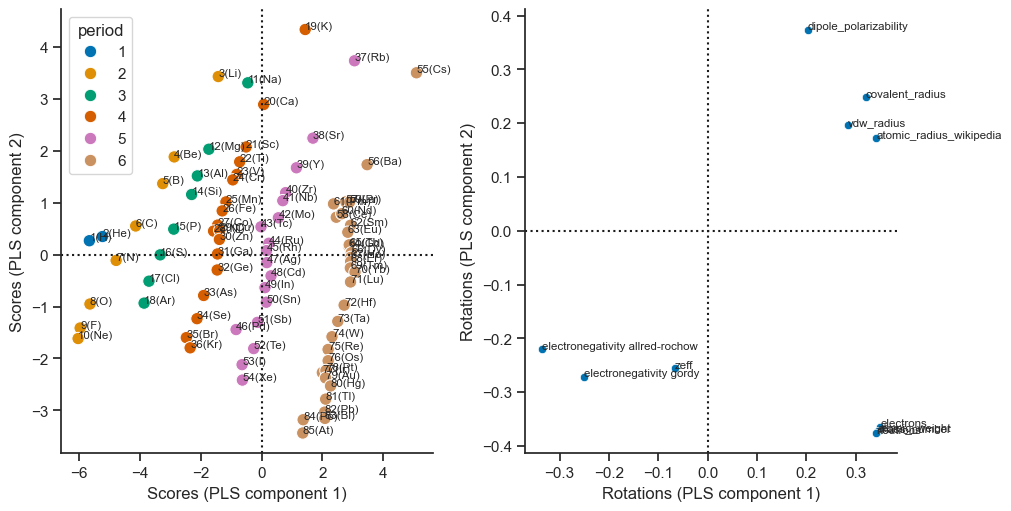

In [49]:
scores_and_loadings(
    periodic,
    x_scores,
    x_rotations,
    x_vars,
    hue="period",
    palette="colorblind",
)

#### Your answer to question 5.3(b): Are there any trends/groupings or outliers in the scores and what variables can be used to interpret them?

The scores plot show "stripes" that mirror the periodic system. By coloring according to the period, we see that the "stripes" (along component 1) corresponds to the different periods. The elements are also ordered (with the exception of H and He) from low to high atom numbers along the second principal component. This suggest that component 1 describes the electron shell structure, while component 2 could describe nuclear charge.

In the loadings, we see strong correlations between the number of electrons, neutrons, and the atomic weight/mass. Along component 1 we see that these variables are also correlated with size-related variables.

The different size-related variables are correlated  amongst themselves and with dipole polarizability, which is consistent with the principle that larger atoms tend to be more polarizable. 

Furthermore, the two electronegativity scales are positively correlated, yet negatively correlated with radii, suggesting that smaller atoms typically exhibit higher electronegativity. The electronegativity value is also correlated with the the effective nuclear charge, suggesting that higher effective nuclear charge results in a stronger attraction on valence electrons.

No particular points seem to be outliers.

### 5.3(c)

**Task: Inspect the scores and rotations for Y by creating 2D scatter plots. Are there any trends/groupings or outliers in the scores? What of the original Y-variables can, if groups/trends are present, be used to interpret these trends?**

**Hints:**

1. Assuming that `pls` is the fitted object containing the PLS model, and `X` and `Y` are our raw data, we can get the scores and rotations by:
```python
x_scores, y_scores = pls.transform(X, y=Y)
y_rotations = pls.y_rotations_
```

2. For the scatter plots, you have two options. To plot the scores and rotations for the two PLS components in two different plots, or in the same plot (as a biplot). The biplot can sometimes help interpretation, but can be crowded if there are many samples and features.


**Notes:**

1. We use the rotations here instead of the loadings (or weights). This is because the Y-rotations apply directly to the Y data to create the scores. Thus, the rotations tell use more directly the relation between the original variables and the calculated scores.

In [50]:
x_scores, y_scores = pls_periodic.transform(X_peri, y=Y_peri)
y_rotations = pls_periodic.y_rotations_

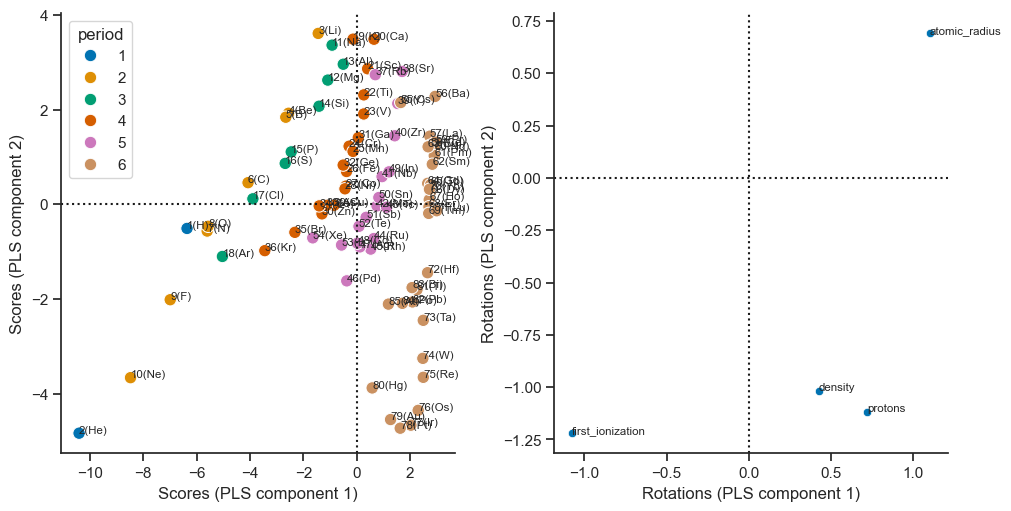

In [51]:
scores_and_loadings(
    periodic,
    y_scores,
    y_rotations,
    y_vars,
    hue="period",
    palette="colorblind",
)

#### Your answer to question 5.3(c): Are there any trends/groupings or outliers in the scores and what variables can be used to interpret them?

We still see some grouping similar to the grouping for the X-scores, i.e., "stripes" along component 1 that corresponds to the period. Along component 2, elements are ordered according to their atomic radius. However, the alignment is less distinct than in the X-scores, suggesting both components reflect a mix of period and group trends.

The atomic radius and first ionization energy are negatively correlated, while density and proton count are positively correlated.  Along component 1, the number of protons and density are positively correlated with the atomic radius which could reflect that in groups, an increase in the proton count will increase the radius. They are negatively correlated along component 2 and this could reflect periods, where an increase in the proton count gives a decrease in the radius.

He and Ne (and possibly F) seem to be far away from the other atoms and could be potential outliers. However, their location and order reflect their high first ionization energies (the 3 highest first ionization energies).

### 5.3(d)

**Task: Inspect the X-rotations and Y-loadings together. Which of the X-variables could be important for predicting the different Y-variables (answer this by exploring the correlations between the X-variables and the Y-variables).**

**Hints:** 

1. Assuming that `pls` is the fitted object containing the PLS model, we can get the scores for Y by:
```python
y_loadings = pls.y_loadings_
```

**Notes:**

1. We use the X-rotations ($R$) and Y-loadings ($Q$) because they help us understand the relationships between the X-variables and the Y-variables in the PLS model. The PLS model $Y = XB = XRQ^T$ shows that the regression coefficients ($B$) can be decomposed into the product of $R$ and $Q^T$. Therefore, plotting $R$ and $Q$ together helps us investigate correlations captured by the PLS model.

In [52]:
y_loadings = pls_periodic.y_loadings_
x_loadings = pls_periodic.x_loadings_

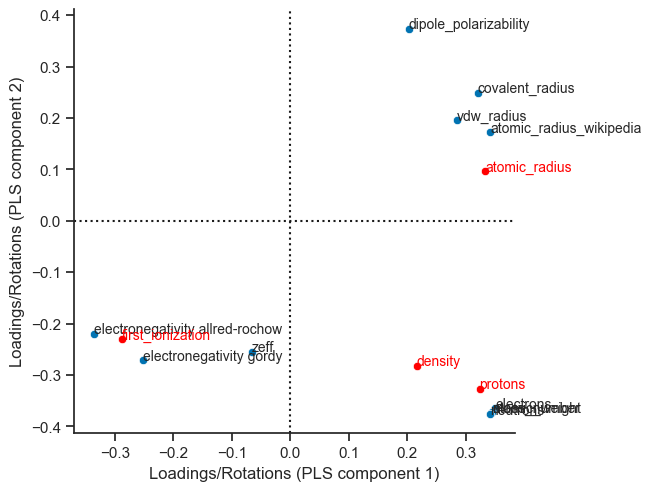

In [53]:
fig, ax = plt.subplots(constrained_layout=True)


scatter_loadings = sns.scatterplot(
    x=x_rotations[:, 0], y=x_rotations[:, 1], ax=ax
)
for i, txt in enumerate(x_vars):
    ax.text(x_rotations[i, 0], x_rotations[i, 1], txt, fontsize="small")

scatter_loadings = sns.scatterplot(
    x=y_loadings[:, 0], y=y_loadings[:, 1], ax=ax, color="red"
)

for i, txt in enumerate(y_vars):
    ax.text(
        y_loadings[i, 0],
        y_loadings[i, 1],
        txt,
        fontsize="small",
        color="red",
    )

ax.set(
    xlabel=f"Loadings/Rotations (PLS component 1)",
    ylabel=f"Loadings/Rotations (PLS component 2)",
)

ax.axhline(y=0, ls=":", color="k")
ax.axvline(x=0, ls=":", color="k")
sns.despine(fig=fig)

#### Your answer to question 5.3(d): What X-variables seem important for predicting Y and what variables are correlated?

The first ionization energy is positively correlated with the electronegativity, the proton count (and density) are positively correlated with the electron count, and the atomic radius is positively correlated with the other radii. The atomic radius is also negatively correlated with the electronegativity. We can visualise these correlations:

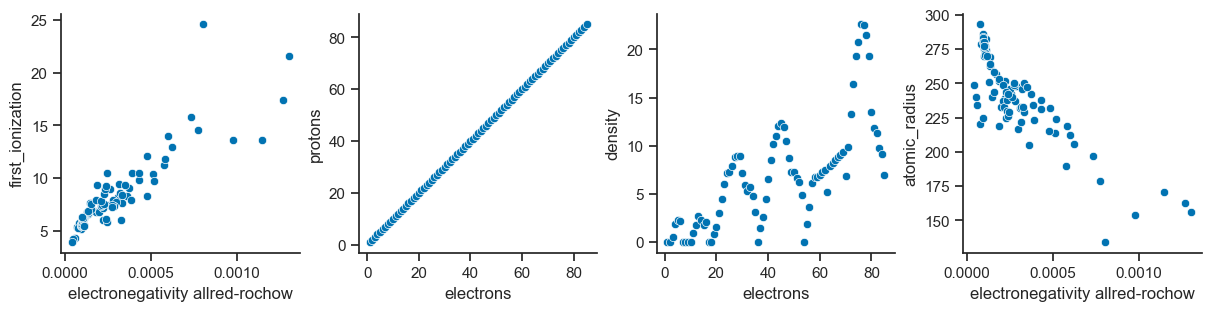

In [54]:
fig, axes = plt.subplots(constrained_layout=True, ncols=4, figsize=(12, 3))
sns.scatterplot(
    data=periodic,
    x="electronegativity allred-rochow",
    y="first_ionization",
    ax=axes[0],
)
sns.scatterplot(
    data=periodic,
    x="electrons",
    y="protons",
    ax=axes[1],
)
sns.scatterplot(
    data=periodic,
    x="electrons",
    y="density",
    ax=axes[2],
)
sns.scatterplot(
    data=periodic,
    x="electronegativity allred-rochow",
    y="atomic_radius",
    ax=axes[3],
)
sns.despine(fig=fig)

This suggest that we could potentially create a simplified model with just two x-variables, the number of electrons and the electronegativity. Let us check and compare:

R² (all X variables): 0.7478707125643729
R² (X: electrons and electronegativity): 0.7776620573364106


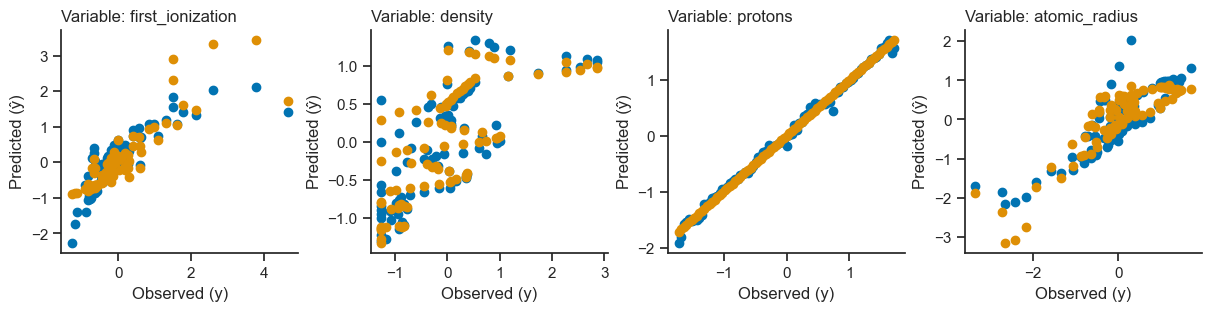

In [55]:
Y_peri_hat = pls_periodic.predict(X_peri)
print("R² (all X variables):", r2_score(Y_peri, Y_peri_hat))

X_peri2 = StandardScaler().fit_transform(
    periodic[["electrons", "electronegativity allred-rochow"]].to_numpy()
)
model2 = PLSRegression(n_components=2)
model2.fit(X_peri2, Y_peri)
Y_peri_hat_2 = model2.predict(X_peri2)
print(
    "R² (X: electrons and electronegativity):", r2_score(Y_peri, Y_peri_hat_2)
)

fig, axes = plt.subplots(constrained_layout=True, ncols=4, figsize=(12, 3))

for i, yvar in enumerate(y_vars):
    axes[i].scatter(Y_peri[:, i], Y_peri_hat[:, i])
    axes[i].scatter(Y_peri[:, i], Y_peri_hat_2[:, i])
    axes[i].set_title(f"Variable: {yvar}", loc="left")
    axes[i].set_xlabel("Observed (y)")
    axes[i].set_ylabel("Predicted (ŷ)")
sns.despine(fig=fig)

# Appendix

## A. Leave-one-out cross-validation

In Leave-one-out cross-validation (LOOCV), we first pick one sample,
measurement number $j$, and we fit the model using the $n-1$ other points
(all points except $j$). After the fitting, we check how well the model can predict
measurement $j$ by calculating the difference between the
measured ($y_j$) and predicted ($\tilde{y}_j$) value. This difference, $r_j = y_{j} - \tilde{y}_j$, is
called the predicted residual, and it tells us the error we just made.

There is nothing special about picking point $j$, and we can try all possibilities
of leaving one point out, fitting the model using the remaining $n-1$
measurements, and predicting the value we left out.
After doing this for all possibilities, we have fitted the model
$n$ times and calculated $n$ predicted residuals. The mean squared error (obtained from the squared
residuals), $\mathrm{MSE}_{\mathrm{CV}}$, can then be used
to estimate the error in the model,

\begin{equation}
\mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n} \sum_{i=1}^{n} r_i^2 =  \frac{1}{n} \sum_{i=1}^{n} (y_i - \tilde{y}_i)^2,
\end{equation}

where $y_i$ is the measured $y$ in experiment $i$, and $\tilde{y}_i$ is the
predicted $y$, using a model which was fitted using all points *except* $y_i$.

For a polynomial fitting, there is an alternative to refitting the model $n$ times. In fact,
we can show that for polynomial fitting, the mean squared error can
be obtained by,

\begin{equation}
\mathrm{MSE}_{\mathrm{CV}} = \frac{1}{n}\sum_{i=1}^{n} (y_i - \tilde{y}_i)^2 =
\frac{1}{n}\sum_{i=1}^{m} \left(\frac{y_i - \hat{y}_i}{1 - h_{ii}} \right)^2,
\end{equation}

where the $\hat{y}_i$'s are predicted values using the
model fitted with *all data points*,
and $h_{ii}$ is the $i$'th diagonal element of the
$\mathbf{H}$ matrix (the projection matrix,
see Eq.(4.49) on page 49 in our textbook),

\begin{equation}
\mathbf{H} =
\mathbf{X} 
\left( 
  \mathbf{X}^\mathrm{T} \mathbf{X}
\right)^{-1}
\mathbf{X}^\mathrm{T} = \mathbf{X} \mathbf{X}^+,
\end{equation}

Note the difference between $\hat{y}_i$ and $\tilde{y}_i$, and the
fact that we  do not have to do the
refitting(!) to obtain the $\mathrm{MSE}_{\mathrm{CV}}$.

When you calculate $\mathrm{MSE}_{\mathrm{CV}}$, use one of the two approaches above or both
if you want to see if they give the same answer.

In [ ]:
# The examples below assume that the matrix X is called X_temp
# and that y is stored in the variable pressure.

# Example 1 of LOOCV:
from sklearn.linear_model import LinearRegression

# scikit-learn has a method to pick out samples for leave-one-out:
from sklearn.model_selection import LeaveOneOut


loo = LeaveOneOut()
error = []
# Split the X-data in X_temp into training and testing:
for train_index, test_index in loo.split(X_temp):
    # train_index = index of samples to use for training
    # test_index = index of samples to use for testing
    # Pick out samples (for training and testing):
    X_train, X_test = X_temp[train_index], X_temp[test_index]
    y_train, y_test = pressure[train_index], pressure[test_index]
    # Fit a new model with the training set:
    model = LinearRegression(fit_intercept=True).fit(X_train, y_train)
    # Predict y for the test set:
    y_hat = model.predict(X_test)
    # Compare the predicted y values in the test set with the measured ones:
    error.append((y_test - y_hat) ** 2)
rmsecv_1 = np.sqrt(np.mean(error))
print(f"RMSECV = {rmsecv_1}")

In [ ]:
# Example 2 of LOOCV:

# scikit-learn has a method for leave-one-out selection, and a method for
# cross-validation. And these two can be combined:
from sklearn.model_selection import LeaveOneOut, cross_val_score

# Create "empty" model for fitting:
model = LinearRegression(fit_intercept=True)
# Run cross-validation, where we select testing and training with LeaveOneOut:
scores = cross_val_score(
    model, X_temp, pressure, scoring="neg_mean_squared_error", cv=LeaveOneOut()
)
rmsecv_2 = np.sqrt(np.mean(-scores))
print(f"RMSECV = {rmsecv_2}")

In [ ]:
# Example 3 of LOOCV:

# We calculate the H matrix and use that:
# OBS! First, a detail that is easy to miss; The X used for H includes the column of ones!
X_matrix = np.column_stack((np.ones_like(temperature), temperature))
H = X_matrix @ np.linalg.pinv(X_matrix)
hii = np.diagonal(H)
residuals_loo = (pressure - pressure_hat) / (1 - hii)
rmsecv_3 = np.sqrt(np.mean(residuals_loo**2))
print(f"RMSECV = {rmsecv_3}")

## Your feedback for Exercise 5

1. **Time & Difficulty:**
* Length (1=too short, 5=too long): 1  2  3  4  5
* Difficulty (1=too easy, 5=too difficult): 1  2  3  4  5
* Most challenging part: ________________________

2. **Code Examples:**
* More or less example code?  More  Less  About Right
* Areas where more examples would be helpful: ________________________

3. **Errors/Inconsistencies:** Did you encounter any?  Yes  No  If yes, please describe: ________________________
    
4. **Suggestions:** How could this exercise be improved? ________________________